# Maximal Clique Problem

---

## Objective

The goal of this problem is to analyze an undirected graph to identify its **Maximal Clique**. 

### Key Tasks:
1. **Find the largest clique** in the graph (a set of nodes where every pair is connected).
2. Return the **number of nodes** and one of the **solutions** of the maximal clique.


---

## Graph Generation

The following function was provided to generate random undirected graphs for testing the solution to the **Maximal Clique Problem**. The generated graphs are saved in a file with their vertices and edges described.

In [60]:
import networkx as nx
import random

def create_graph(num_vertices, probabilidade_conexao, nome_arquivo):

    # Crie um grafo aleatório densamente conectado
    grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

    # Abra o arquivo para escrita
    with open(nome_arquivo, 'w') as arquivo:
        # Escreva a quantidade de vértices e número de arestas na primeira linha
        arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

        # Escreva as arestas no formato de lista de adjacência
        for aresta in grafo.edges():
            arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

    print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

The following function was provided to solve the undirected graphs.

In [61]:
def max_clique(nome_arquivo):
    # Abrir o arquivo e pular a primeira linha
    with open(nome_arquivo, 'r') as arquivo:
        next(arquivo)  # Pula a primeira linha

        # Lê o grafo a partir das linhas restantes
        G = nx.parse_adjlist(arquivo)

    # Encontrar todas as cliques maximais
    cliques_maximais = list(nx.find_cliques(G))

    # Determinar o tamanho da maior clique
    tamanho_maximo = max(len(clique) for clique in cliques_maximais)

    # Encontrar uma clique que tem o tamanho máximo
    clique_maxima = next(clique for clique in cliques_maximais if len(clique) == tamanho_maximo)

    # Imprimir apenas o tamanho e uma clique exemplo
    print("Tamanho da maior clique:", tamanho_maximo)
    print("Exemplo de clique máxima:", clique_maxima)



The code snippet below generates the undirected graphs that will be used to test the performance and accuracy of each algorithm designed for solving the Maximal Clique Problem.

In [62]:
lista_vertices = [5,25,50,125,100,150,200,250]

for i in lista_vertices:
    create_graph(i, 0.7, f"grafos/grafo_{i}_vertices.txt")

Grafo densamente conectado gerado e salvo em 'grafos/grafo_5_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_25_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_50_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_125_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_100_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_150_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_200_vertices.txt'.
Grafo densamente conectado gerado e salvo em 'grafos/grafo_250_vertices.txt'.


In [ ]:
#Teste de Limite 15 min
create_graph(400, 0.7, f"grafos/grafo_300_vertices.txt")

Grafo densamente conectado gerado e salvo em 'grafos/grafo_300_vertices.txt'.


---

## Algorithm Overview

To solve the **Maximal Clique Problem**, three distinct algorithmic approaches will be implemented and tested:


### Sequential Exhaustive Search

The sequential Exhaustive Search consists of four different stages:

1. **Graph Reading**
2. **Bitset Conversion**
3. **Ordering by Vertex Degree**
4. **Algorithm Implementation**

#### Graph Reading

The algorithm begins by reading the graph file, which is generated by the Python function demonstrated earlier. This file contains the number of vertices in the graph and its adjacency matrix. The adjacency matrix represents the connections between vertices in the graph.

Below is an example of an adjacency matrix:

|       | **1** | **2** | **3** | **4** |
|-------|-------|-------|-------|-------|
| **1** |   0   |   1   |   1   |   0   |
| **2** |   1   |   0   |   1   |   1   |
| **3** |   1   |   1   |   0   |   1   |
| **4** |   0   |   1   |   1   |   0   |

In this example:
- A `1` indicates a connection (edge) between two vertices.
- A `0` indicates no connection between the vertices.
- For instance, vertex 1 is connected to vertices 2 and 3 but not to vertex 4.

This adjacency matrix is passed to the main function for further processing.

```cpp
vector<vector<int>> LerGrafo(const string& nomeArquivo, int &numVertices) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        throw runtime_error("Erro ao abrir o arquivo: " + nomeArquivo);
    }

    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;
    }

    arquivo.close();
    return grafo;
}

#### Bitset Conversion

To further enhance the algorithm's efficiency, the adjacency matrix is replaced by a bitset representation. This optimization reduces memory usage and speeds up operations like adjacency checks by leveraging bitwise operations. In this new representation, the adjacency matrix is converted into a vector of bitsets, where each bitset represents the connections for a single vertex.

Below is an example of the conversion and a comparison of memory usage:


**Adjacency Matrix**:

|       | **1** | **2** | **3** | **4** |
|-------|-------|-------|-------|-------|
| **1** |   0   |   1   |   1   |   0   |
| **2** |   1   |   0   |   1   |   1   |
| **3** |   1   |   1   |   0   |   1   |
| **4** |   0   |   1   |   1   |   0   |


**Bitset Representation**:

| **Vertex** | **Adjacency Matrix Row** | **Bitset Representation** | **Connected To**    |
|------------|---------------------------|---------------------------|----------------------|
| **1**      | `0 1 1 0`                | `0b0110`                  | Vertices 2, 3        |
| **2**      | `1 0 1 1`                | `0b1011`                  | Vertices 1, 3, 4     |
| **3**      | `1 1 0 1`                | `0b1101`                  | Vertices 1, 2, 4     |
| **4**      | `0 1 1 0`                | `0b0110`                  | Vertices 2, 3        |


**Memory Usage Comparison**

| **Representation**       | **Memory Usage (4 vertices)**                 | **General Case**               |
|---------------------------|-----------------------------------------------|---------------------------------|
| **Adjacency Matrix**      | 16 bytes (4 rows × 4 columns × 1 byte/entry) | Quadratic growth: `n² bytes`   |
| **Bitset Representation** | 4 bytes (4 rows × 1 byte/row)                | Linear growth: `n bytes`       |



**Explanation of Memory Usage**

- **Adjacency Matrix**:
   - For a graph with `n` vertices, the adjacency matrix requires `n × n` entries.
   - Each entry typically takes 1 byte. For a 4-vertex graph, this means `4 × 4 = 16 bytes`.

- **Bitset Representation**:
   - For a graph with `n` vertices, each vertex's adjacency is stored as a `bitset` of size `n`.
   - A single bit is used per connection, reducing memory usage. For a 4-vertex graph, this means `4 × 1 byte = 4 bytes` (since 8 bits = 1 byte).

**Summary**

By replacing the adjacency matrix with a bitset representation:
1. **Memory Usage**:
   - The bitset representation reduces memory usage from quadratic (`n² bytes`) to linear (`n bytes`), making it significantly more efficient for large graphs.
2. **Speed**:
   - Enables faster adjacency checks and operations like intersection using bitwise operations.
3. **Scalability**:
   - Makes the algorithm feasible for larger graphs that would exceed memory limits using an adjacency matrix.



```cpp
// Converte a matriz de adjacência para bitsets
for (int i = 0; i < numVertices; i++) {
    // Zera o bitset
    adjacency[i].reset();
    for (int j = 0; j < numVertices; j++) {
        // Se houver uma aresta entre os vértices i e j, seta o bit correspondente
        if (graph[i][j] == 1) {
            adjacency[i].set(j);
        }
    }
}

#### Ordering by Vertex Degree

In this code, the heuristic of **ordering vertices by degree** (number of edges connected to each vertex) is employed. The rationale is that vertices with higher degrees are more likely to belong to larger cliques, as they have more connections. By prioritizing these vertices, the algorithm can potentially find the maximal clique faster, leading to performance improvements.

**Pros**
1. **Faster Pruning**:  
   High-degree vertices are more likely to contribute to a maximal clique. By starting with them, the algorithm can quickly build larger cliques and prune the search tree earlier.

2. **Efficiency in Dense Graphs**:  
   In graphs where many vertices are highly connected, this heuristic can significantly reduce the search space by focusing on promising regions of the graph first.

3. **Improved Early Results**:  
   Early discovery of large cliques improves pruning effectiveness, as it sets higher thresholds for later checks.

4. **Better Performance on Large Graphs**:  
   For graphs with a high number of vertices, this approach can save significant computational time.

**Cons**
1. **Inefficiency in Sparse Graphs**:  
   In graphs with low connectivity, high-degree vertices may not contribute to cliques at all, making the heuristic less effective.

2. **Overhead of Sorting**:  
   Sorting the vertices by degree adds an **O(n log n)** preprocessing step, which could be a bottleneck for very large graphs.

3. **Heuristic Limitations**:  
   The heuristic does not guarantee the best performance in all cases. For certain graph topologies, other heuristics (e.g., degeneracy ordering) might be more effective.

4. **Potential Misleading Priority**:  
   High-degree vertices are not always part of the maximal clique. Over-prioritizing them can lead to suboptimal pruning in some scenarios.

```cpp
// Vetor de pares (grau, vértice)
vector<pair<int, int>> degreeVertexPairs;
// Reserva espaço para o vetor
degreeVertexPairs.reserve(numVertices);

// Calcula o grau e ordena os vértices por grau decrescente
for (int i = 0; i < numVertices; ++i) {
    // Conta o número de bits setados no bitset
    int degree = (int)adjacency[i].count();
    // Adiciona o par (grau, vértice) ao vetor
    degreeVertexPairs.push_back({degree, i});
}

// Ordena o vetor por grau decrescente
sort(degreeVertexPairs.rbegin(), degreeVertexPairs.rend());

#### Alorithm Implementation

This function implements a recursive algorithm to find the **maximum clique** in a graph. Here's a step-by-step explanation.

**1. Base Case: No More Candidates**

If there are no more candidates:
- The function checks whether the size of the `currentClique` is greater than the largest clique found so far (`bestCliqueSizeGlobal`).
- If it is, `bestCliqueSizeGlobal` is updated with the new size, and the `currentClique` is saved as the new `bestClique`.
- The function then returns, as no further exploration is needed.

```cpp
// Se não houver mais candidatos, a clique atual é a maior encontrada
if (candidates.empty()) {
    // Atualiza a maior clique encontrada caso a clique atual seja maior
    if ((int)currentClique.size() > bestCliqueSizeGlobal) {
        bestCliqueSizeGlobal = (int)currentClique.size();
        bestClique = currentClique;
    }
    return;
}
```


**2. First Pruning Condition**

Before iterating over the candidates, the function performs a pruning step:
- It calculates the maximum possible size of a clique by summing the size of the `currentClique` and the number of `candidates`.
- If this sum is less than or equal to `bestCliqueSizeGlobal`, further exploration is unnecessary, and the function returns early.

```cpp
// Podagem: Se o tamanho da clique atual mais o número de candidatos restantes não puder exceder o tamanho da maior clique global, retorna
if ((int)currentClique.size() + (int)candidates.size() <= bestCliqueSizeGlobal) {
    return;
}

```


**3. Iterating Over Candidates**

The function iterates through the candidates in reverse order:
- For each vertex `v` in the candidates list, it checks whether adding `v` can lead to a larger clique.

```cpp
// Itera sobre os candidatos em ordem reversa
for (int i = (int)candidates.size() - 1; i >= 0; --i) {
    // Vértice atual
    int v = candidates[i];
    // Resto do Código
    ...
}
```

**4. Second Pruning Condition**

During the iteration:
- The function calculates the maximum size of a potential clique using the current index `i`.
- If this size (current clique size plus `i + 1`) cannot exceed `bestCliqueSizeGlobal`, the loop terminates early.

```cpp
if ((int)currentClique.size() + i + 1 <= bestCliqueSizeGlobal) {
    return;
}

```


**5. Adjacency Check**

For each vertex `v`, the function verifies if `v` is adjacent to all vertices in the `currentClique`:
- If `v` is not adjacent to any vertex in the clique, it skips further exploration for `v`.

```cpp
 // Checa se o vértice v pode ser adicionado à clique atual (é adjacente a todos os vértices da clique atual)
for (int u : currentClique) {
    if (!adjacency[u].test(v)) {
        goto skip_vertex;
    }
}
```


**6. Adding the Vertex**

If `v` passes the adjacency check:
- It is added to the `currentClique`.

```cpp
// Adiciona o vértice v à clique atual
currentClique.push_back(v);
```

**7. Filtering New Candidates**

The function creates a new list of candidates (`newCandidates`) by intersecting:
- The adjacency list of `v`.
- The list of vertices already in the candidates list before `v`.

This ensures that `newCandidates` only contains vertices that are adjacent to all members of the updated `currentClique`.

```cpp

// Cria uma máscara de bits para a relação de adjacência de v com todos os vértices da clique atual
bitset<MAX_VERTICES> mask;
// Começa com a adjacência de v
mask = adjacency[v];
// Intersecta com a adjacência de todos os vértices da clique atual
for (int u : currentClique) {
    // Ignora o caso em que u é o próprio v
    if (u == v) continue;
    // Interseção bit a bit (AND)
    mask &= adjacency[u];
}

// Cria novos candidatos
vector<int> newCandidates;
// Reserva espaço para o vetor
newCandidates.reserve(i); 
// Considera apenas os vértices que aparecem na máscara e estão em 'candidates[0..i-1]'
for (int j = 0; j < i; j++) {
    int c = candidates[j];
    // Se o vértice c está na máscara (é 1), adiciona-o aos novos candidatos
    if (mask.test(c)) {
        newCandidates.push_back(c);
    }
}
```


**8. Recursive Call**

The function calls itself recursively with:
- The filtered list of `newCandidates`.
- The updated `currentClique`.

This explores all potential cliques that include the vertex `v`.


```cpp
// Chama recursivamente a função
findMaximumClique(newCandidates, currentClique, bestClique);
```

**9. Backtracking**

After the recursive call:
- The function removes `v` from the `currentClique` (backtracking).
- This allows the function to explore alternative paths without including `v`.

```cpp
// Backtrack da função recursiva
currentClique.pop_back();
```

**10. Skip Vertex**

If a vertex `v` fails any of the conditions (e.g., pruning or adjacency check):
- It is skipped, and the next candidate is evaluated.

```cpp
for (){
// Pula para o próximo vértice
skip_vertex: ;
}
```

**Summary**

The function explores all possible subsets of vertices that can form a clique, using pruning and backtracking to reduce unnecessary computations. By prioritizing candidates and carefully managing recursion, the algorithm efficiently finds the largest clique in the graph.


#### Full Implementation

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <fstream>
#include <chrono>
#include <stdexcept>
#include <bitset>

using namespace std;
using namespace std::chrono;

/*Ajuste o valor de MAX_VERTICES conforme necessário para o tamanho máximo do grafo sendo que MAX_VERTICES deve ser múltiplo de 64.
Uma vez que iremos trabalhar com  bitsets. Além do mais, o valor de MAX_VERTICES deve ser maior ou igual ao número de vértices do grafo.*/
const int MAX_VERTICES = 2048; 
// Checa se MAX_VERTICES é múltiplo de 64
static_assert(MAX_VERTICES % 64 == 0, "MAX_VERTICES should be multiple of 64");

// O grafo é representado por um vetor de bitsets, onde cada bitset representa a adjacência de um vértice.
static bitset<MAX_VERTICES> adjacency[MAX_VERTICES];

// Variável global para armazenar o tamanho da maior clique encontrada
int bestCliqueSizeGlobal = 0; 

void findMaximumClique(const vector<int> &candidates, vector<int> &currentClique, vector<int> &bestClique);

vector<vector<int>> LerGrafo(const string& nomeArquivo, int &numVertices);

int main(int argc, char* argv[]) {
    // Verifica se o nome do arquivo foi fornecido
    if (argc < 2) {
        cerr << "Uso: " << argv[0] << " <nome_do_arquivo>" << endl;
        return 1;
    }
    // Recebe o nome do arquivo da linha de comando
    string nomeArquivo = argv[1];
    // Número de vértices no grafo
    int numVertices;

    // Lê o grafo
    vector<vector<int>> graph = LerGrafo(nomeArquivo, numVertices);
    // Verifica se o número de vértices não excede MAX_VERTICES
    if (numVertices > MAX_VERTICES) {
        cerr << "Number of vertices exceeds MAX_VERTICES. Increase MAX_VERTICES." << endl;
        return 1;
    }

    // Converte a matriz de adjacência para bitsets
    for (int i = 0; i < numVertices; i++) {
        // Zera o bitset
        adjacency[i].reset();
        for (int j = 0; j < numVertices; j++) {
            // Se houver uma aresta entre os vértices i e j, seta o bit correspondente
            if (graph[i][j] == 1) {
                adjacency[i].set(j);
            }
        }
    }

    // Vetor de pares (grau, vértice)
    vector<pair<int, int>> degreeVertexPairs;
    // Reserva espaço para o vetor
    degreeVertexPairs.reserve(numVertices);

    // Calcula o grau e ordena os vértices por grau decrescente
    for (int i = 0; i < numVertices; ++i) {
        // Conta o número de bits setados no bitset
        int degree = (int)adjacency[i].count();
        // Adiciona o par (grau, vértice) ao vetor
        degreeVertexPairs.push_back({degree, i});
    }

    // Ordena o vetor por grau decrescente
    sort(degreeVertexPairs.rbegin(), degreeVertexPairs.rend());

    // Vetor de candidatos
    vector<int> candidates;
    // Reserva espaço para o vetor
    candidates.reserve(numVertices);
    // Adiciona os vértices ordenados por grau decrescente
    for (auto &p : degreeVertexPairs) {
        candidates.push_back(p.second);
    }
    // Vetor para armazenar a clique atual
    vector<int> currentClique;
    // Reserva espaço para o vetor
    currentClique.reserve(numVertices);
    // Vetor para armazenar a maior clique encontrada
    vector<int> bestClique;
    // Reserva espaço para o vetor
    bestClique.reserve(numVertices);

    // Contagem de tempo
    auto start_time = high_resolution_clock::now();
    // Encontra a maior clique
    findMaximumClique(candidates, currentClique, bestClique);
    auto end_time = high_resolution_clock::now();

    auto duration = duration_cast<std::chrono::duration<double>>(end_time - start_time);

    cout << "Maximum Clique Size: " << bestClique.size() << endl;
    cout << "Vertices in the Maximum Clique: ";
    for (int vertex : bestClique) {
        cout << vertex + 1 << " ";
    }
    cout << endl;
    cout << "Time taken: " << duration.count() << " seconds" << endl;

    return 0;
}

void findMaximumClique(const vector<int> &candidates, vector<int> &currentClique, vector<int> &bestClique) {
    // Se não houver mais candidatos, a clique atual é a maior encontrada
    if (candidates.empty()) {
        // Atualiza a maior clique encontrada caso a clique atual seja maior
        if ((int)currentClique.size() > bestCliqueSizeGlobal) {
            bestCliqueSizeGlobal = (int)currentClique.size();
            bestClique = currentClique;
        }
        return;
    }

    // Podagem: Se o tamanho da clique atual mais o número de candidatos restantes não puder exceder o tamanho da maior clique global, retorna
    if ((int)currentClique.size() + (int)candidates.size() <= bestCliqueSizeGlobal) {
        return;
    }

    // Itera sobre os candidatos em ordem reversa
    for (int i = (int)candidates.size() - 1; i >= 0; --i) {
        // Vértice atual
        int v = candidates[i];

        // Segunda podagem: Se o tamanho da clique atual mais o número de candidatos restantes não puder exceder o tamanho da maior clique global, retorna
        if ((int)currentClique.size() + i + 1 <= bestCliqueSizeGlobal) {
            return;
        }

        // Checa se o vértice v pode ser adicionado à clique atual (é adjacente a todos os vértices da clique atual)
        for (int u : currentClique) {
            if (!adjacency[u].test(v)) {
                goto skip_vertex;
            }
        }

        // Adiciona o vértice v à clique atual
        currentClique.push_back(v);

        // Constrói novos candidatos por interseção dos candidatos anteriores com a adjacência de v e chama recursivamente a função
        {
            // Cria uma máscara de bits para a relação de adjacência de v com todos os vértices da clique atual
            bitset<MAX_VERTICES> mask;
            // Começa com a adjacência de v
            mask = adjacency[v];
            // Intersecta com a adjacência de todos os vértices da clique atual
            for (int u : currentClique) {
                // Ignora o caso em que u é o próprio v
                if (u == v) continue;
                // Interseção bit a bit (AND)
                mask &= adjacency[u];
            }

            // Cria novos candidatos
            vector<int> newCandidates;
            // Reserva espaço para o vetor
            newCandidates.reserve(i); 
            // Considera apenas os vértices que aparecem na máscara e estão em 'candidates[0..i-1]'
            for (int j = 0; j < i; j++) {
                int c = candidates[j];
                // Se o vértice c está na máscara (é 1), adiciona-o aos novos candidatos
                if (mask.test(c)) {
                    newCandidates.push_back(c);
                }
            }
            // Chama recursivamente a função
            findMaximumClique(newCandidates, currentClique, bestClique);
        }

        // Backtrack da função recursiva
        currentClique.pop_back();
        // Pula para o próximo vértice
        skip_vertex: ;
    }
}

vector<vector<int>> LerGrafo(const string& nomeArquivo, int &numVertices) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        throw runtime_error("Erro ao abrir o arquivo: " + nomeArquivo);
    }

    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;
    }

    arquivo.close();
    return grafo;
}

```

Furthermore, the code takes more than 15 minutes to run after `400` vertexes.

### Parallel Implementation

The code implements a heuristic algorithm to find a large clique in a given graph. The process involves two main stages:

1. **Greedy Heuristic for Initial Clique Construction**:  
   The algorithm starts by sorting the vertices by their degree (from highest to lowest) and then builds an initial clique greedily using this order. Starting from the highest-degree vertex, it tries to include subsequent vertices that maintain the clique property.

2. **Hill Climbing (Local Search)**:  
   After constructing an initial clique, the algorithm applies a form of local search (hill climbing). It performs multiple iterations where it perturbs the order of the vertices and attempts to construct a new clique. If the new clique is larger, it replaces the current best solution.

The hill climbing involves a simple "perturbation" step: swapping two random candidates in the order and then re-running the greedy construction. By iterating this process and keeping track of the best clique found, the algorithm attempts to escape local maximum and find a larger clique.

#### The **Greedy Heuristic** for Clique Construction can be described as follows:

1. **Sort vertices by degree in descending order**. High-degree vertices are more likely to form larger cliques with other vertices that also have many connections.
2. **Starting from the first vertex in this order**, add it to the clique.
3. **Iterate through the remaining vertices in sorted order**:
   - For each vertex, check if it is adjacent to every vertex currently in the clique.
   - If yes, include it in the clique; if not, skip it.
   
This method is greedy because it makes the locally optimal choice of taking the next highest-degree vertex that still forms a clique with the chosen vertices, without considering future consequences.

####  What is the Hill Climbing Step?

**Hill Climbing** is a local search technique used to improve a solution by making small changes and keeping the changes if they yield a better solution. In this code:

1. **Initial Solution**: Start from the clique constructed by the greedy heuristic on the initial vertex ordering.
2. **Perturbation**: Randomly swap two vertices in the candidate list. This changes the order in which the clique construction heuristic is applied.
3. **Reconstruct Clique**: Run the greedy construction again with the new vertex order.
4. **Compare and Update**: If the newly constructed clique is larger, replace the current best solution with this new one.

By repeating these steps multiple times (in parallel), the algorithm attempts to "climb" towards a better solution, escaping from local maxima that the initial greedy approach might have found.

#### Parallelization

To speed up the process, multiple hill climbing iterations are executed in parallel. Each thread has its own random number generator and independently performs perturbations and greedy constructions. Whenever a thread finds an improvement, it updates the globally shared best solution within a synchronized critical region.

This parallel approach reduces the total runtime and increases the chance of finding a larger clique in the same amount of time.


#### Pseudo Code for Heuristic

```pseudo
Função HillClimbHeuristicaGreedy(nomeArquivo, numIteracoes)
    # Ler o grafo a partir do arquivo
    grafo, numVertices = LerGrafo(nomeArquivo)

    # Calcular grau de cada vértice
    degreeVertexPairs = ListaDePares()
    Para i de 0 até numVertices - 1 Faça
        grau = 0
        Para j de 0 até numVertices - 1 Faça
            grau = grau + grafo[i][j]
        Fim Para
        Adicione (grau, i) a degreeVertexPairs
    Fim Para

    # Ordenar vértices por grau em ordem decrescente
    Ordenar degreeVertexPairs de forma que o maior grau fique primeiro

    # Preparar lista de candidatos
    candidatos = ListaDeNós()
    Para cada (grau, vertice) em degreeVertexPairs Faça
        Adicione vertice a candidatos
    Fim Para

    # Constrói clique inicial
    melhorClique = ConstrucaoClique(grafo, candidatos)

    # Preparação para execução paralela
    nThreads = NumeroDeThreadsDisponiveis()
    gens = VetorDeGeradoresAleatoriosDeComprimento(nThreads)
    Para cada gerador em gens Faça
        InicializarGeradorComSeedAleatoria(gerador)
    Fim Para

    # Execução em paralelo do Hill Climbing
    # Cada thread executa várias iterações
    EmParaleloPara it de 0 até numIteracoes - 1 Faça
        tid = IdentificadorDaThreadAtual()
        gen = gens[tid]
        dist = DistribuicaoUniformeEntre(0, TamanhoDe(candidatos)-1)

        # Cria perturbação da ordem de candidatos
        perturbedCandidates = CopiarLista(candidatos)

        idx1 = NumeroAleatorio(dist, gen)
        idx2 = NumeroAleatorio(dist, gen)
        Enquanto idx2 == idx1 Faça
            idx2 = NumeroAleatorio(dist, gen)
        Fim Enquanto
        TrocarElementos(perturbedCandidates, idx1, idx2)

        # Constrói nova clique com a nova ordem
        novaClique = ConstrucaoClique(grafo, perturbedCandidates)

        # Verifica se melhorou e atualiza solução global
        Se TamanhoDe(novaClique) > TamanhoDe(melhorClique) Então
            SecaoCritica:
                Se TamanhoDe(novaClique) > TamanhoDe(melhorClique) Então
                    melhorClique = novaClique
                    candidatos = perturbedCandidates
                Fim Se
        Fim Se
    Fim EmParaleloPara

    Retorne melhorClique
Fim Função


#### Summary

- **Greedy Construction**: Start with vertices sorted by descending degree and build a clique by adding vertices that maintain the clique property.
- **Hill Climbing**: Iteratively perturb the candidate list to produce new vertex orders and rerun the greedy construction. If a larger clique is found, keep it.
- **Parallel Execution**: Run many hill climbing iterations in parallel to improve efficiency and potentially find better solutions faster.

By combining a simple greedy heuristic with a local search strategy and parallelism, this approach aims to find large cliques in reasonable computation times.

#### Implementation

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <fstream>
#include <chrono>
#include <random>
#include <omp.h>

using namespace std;
using namespace std::chrono;

vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices);
vector<int> ConstrucaoClique(const vector<vector<int>>& graph, const vector<int>& candidates);

int main(int argc, char* argv[]) {
    if (argc < 3) {
        cerr << "Uso: " << argv[0] << " <nome_do_arquivo> <numero_de_iteracoes>" << endl;
        return 1;
    }

    // Recebe o nome do arquivo da linha de comando
    string nomeArquivo = argv[1]; 
    // Número de iterações para a busca local
    int numIteracoes = stoi(argv[2]); 
    
    int numVertices;
    // Lê o grafo a partir do arquivo fornecido
    vector<vector<int>> graph = LerGrafo(nomeArquivo, numVertices);

    // Calcula o grau de cada vértice
    vector<pair<int, int>> degreeVertexPairs;
    for (int i = 0; i < numVertices; ++i) {
        int degree = 0;
        for (int j = 0; j < numVertices; ++j) {
            degree += graph[i][j];
        }
        degreeVertexPairs.push_back({degree, i});
    }

    // Ordena os vértices por grau decrescente
    sort(degreeVertexPairs.rbegin(), degreeVertexPairs.rend());

    // Prepara a lista de candidatos inicial
    vector<int> candidates;
    for (const auto &pair : degreeVertexPairs) {
        candidates.push_back(pair.second);
    }

    // Inicia a contagem de tempo
    auto start_time = high_resolution_clock::now();

    // Constrói a clique usando a ordem inicial (primeira iteração)
    vector<int> bestClique = ConstrucaoClique(graph, candidates);

    // Preparação para o paralelismo
    // Vamos criar um gerador de números aleatórios por thread
    int nThreads;
    #pragma omp parallel
    {
        #pragma omp single
        nThreads = omp_get_num_threads();
    }

    vector<mt19937> gens(nThreads);
    {
        // Seed global para cada thread
        random_device rd;
        for (int i = 0; i < nThreads; i++) {
            gens[i].seed(rd());
        }
    }

    // Execução das iterações de hill climbing em paralelo
    #pragma omp parallel
    {
        int tid = omp_get_thread_num();
        mt19937 &gen = gens[tid];
        uniform_int_distribution<> dist(0, (int)candidates.size()-1);

        #pragma omp for
        for (int it = 0; it < numIteracoes; ++it) {
            // Cria uma cópia do vetor de candidatos para perturbar
            vector<int> perturbedCandidates = candidates;
            
            // Perturbação simples: troca a posição de dois vértices aleatórios
            int idx1 = dist(gen);
            int idx2 = dist(gen);
            while (idx2 == idx1) {
                idx2 = dist(gen);
            }
            swap(perturbedCandidates[idx1], perturbedCandidates[idx2]);

            // Constrói a clique com a nova ordenação
            vector<int> newClique = ConstrucaoClique(graph, perturbedCandidates);

            // Se melhorou, atualiza a melhor solução (região crítica)
            #pragma omp critical
            {
                if ((int)newClique.size() > (int)bestClique.size()) {
                    bestClique = newClique;
                    candidates = perturbedCandidates;
                }
            }
        }
    }

    // Finaliza a contagem de tempo
    auto end_time = high_resolution_clock::now();
    auto duration = duration_cast<std::chrono::duration<double>>(end_time - start_time);

    // Exibe o tamanho da melhor clique encontrada e os vértices
    cout << "Tamanho da melhor clique encontrada: " << bestClique.size() << endl;
    cout << "Vértices na Clique: ";
    for (int vertex : bestClique) {
        cout << vertex + 1 << " ";
    }
    cout << endl;


    cout << "Tempo gasto para encontrar a clique: " << duration.count() << " segundos" << endl;

    return 0;
}

vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        throw runtime_error("Erro ao abrir o arquivo: " + nomeArquivo);
    }

    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1; 
    }

    arquivo.close();

    return grafo;
}

vector<int> ConstrucaoClique(const vector<vector<int>>& graph, const vector<int>& candidates) {
    vector<int> clique;
    for (int v : candidates) {
        bool canAdd = true;
        for (int u : clique) {
            if (graph[u][v] == 0) {
                canAdd = false;
                break;
            }
        }
        if (canAdd) {
            clique.push_back(v);
        }
    }
    return clique;
}


### MPI Implementation

The MPI Implementation tries to get as close as possible to the exhaustive heuristic (used on sequential) in order to solve the Maximal Clique problem.

A `bitgraph` is represented as a `vector<vector<uint64_t>>`, where each inner vector represents the adjacency of a vertex using 64-bit integers (bits for connections). Below is an example for a graph with 4 vertices:

**Comparison of Bitgraph and Bitset Representations**

The table below compares the same  `adjacency matrix` representation using `bitset` and `bitgraph`:

1. **Adjacency Matrix**:

    | **Vertex** | **Adjacency Matrix Row** |
    |------------|---------------------------|
    | **1**      | `0 1 1 0`                |
    | **2**      | `1 0 1 1`                |
    | **3**      | `1 1 0 1`                |
    | **4**      | `0 1 1 0`                |

2. **Bitset Representation (`bitset<MAX_VERTICES>`)**:

    | **Vertex** | **Bitset Representation** |
    |------------|----------------------------|
    | **1**      | `0110`                     |
    | **2**      | `1011`                     |
    | **3**      | `1101`                     |
    | **4**      | `0110`                     |

3. **Bitgraph Representation (`vector<vector<uint64_t>>`)**:

    | **Vertex** | **Bitgraph Representation (vector<uint64_t>)** |
    |------------|-----------------------------------------------|
    | **1**      | `[0b0110]`                                    |
    | **2**      | `[0b1011]`                                    |
    | **3**      | `[0b1101]`                                    |
    | **4**      | `[0b0110]`                                    |


**Key Differences**:

| **Aspect**           | **Bitset**                         | **Bitgraph**                              |
|-----------------------|------------------------------------|-------------------------------------------|
| **Representation**   | Centralized `bitset<MAX_VERTICES>` | Distributed `vector<vector<uint64_t>>`   |
| **Memory Usage**      | Fixed-size, compact               | Flexible, supports distributed memory     |
| **Parallelism**       | Single-threaded                   | Multi-process, suitable for MPI           |
| **Communication**     | Not required                     | Necessary for process synchronization     |
| **Efficiency**        | Optimized for single-machine use  | Optimized for distributed environments    |

**Summary**

The bitset is highly memory-efficient for single-machine implementations, but its fixed size and centralized nature make it less suitable for distributed systems. The bitgraph, represented by `vector<vector<uint64_t>>`, is more flexible and can easily be partitioned and communicated between processes, making it ideal for MPI-based parallel environments.

#### Algorithm Implementation

**Part 1: Initialization and Setup**:

- **Purpose**: Initialize MPI, read input, and distribute data.
- **Key Steps**:
  1. **MPI Initialization**:
     - `MPI_Init` initializes MPI processes.
     - Each process retrieves its rank and the total number of processes (`MPI_Comm_rank` and `MPI_Comm_size`).
  2. **Graph Reading**:
     - Only the master process (rank 0) reads the input graph using `LerGrafo`.
     - The adjacency matrix is then converted into a flat vector for broadcasting.
  3. **Broadcast Graph Data**:
     - The master broadcasts the number of vertices (`numVertices`) and the flattened graph to all processes using `MPI_Bcast`.
  4. **Reconstruct Adjacency Matrix**:
     - Non-master processes reconstruct the adjacency matrix from the received flat vector.
  5. **Convert to Bitgraph**:
     - The adjacency matrix is converted into a **bitgraph**, where each vertex's adjacency list is represented as a vector of 64-bit integers (`vector<uint64_t>`).

```cpp
```

**Part 2: Candidate Distribution**
- **Purpose**: Distribute vertices among processes for parallel exploration.
- **Key Steps**:
  1. **Sort Candidates**:
     - The master calculates vertex degrees and sorts them in descending order to prioritize high-degree vertices.
  2. **Distribute Candidates**:
     - The candidates are divided among the processes using `MPI_Scatterv`, ensuring an even workload.

**Part 3: Maximum Clique Search**
- **Purpose**: Each process independently searches for the maximum clique starting from its assigned candidates.
- **Key Functions**:
  1. **`buildBitGraph`**:
     - Converts the adjacency matrix to a bitgraph for memory efficiency and fast operations.
  2. **`findMaximumClique`**:
     - Implements a recursive backtracking algorithm to explore all possible cliques.
     - Uses pruning to stop exploration when the current clique cannot exceed the global best size.
  3. **`buildIntersectionMask`**:
     - Constructs a bitmask representing the intersection of adjacencies for vertices in the current clique.
  4. **`filterCandidates`**:
     - Filters candidate vertices based on adjacency to the current clique using the intersection mask.


**Part 4: Communication and Global Result Gathering**
- **Purpose**: Combine results from all processes and determine the global maximum clique.
- **Key Steps**:
  1. **Gather Local Results**:
     - Each process computes its local maximum clique and sends its size to the master process using `MPI_Gather`.
  2. **Find Global Best**:
     - The master determines the largest clique size and the process that found it.
     - The master requests the vertices of the global maximum clique from the best process.
  3. **Broadcast Results**:
     - The global maximum clique size and vertices are broadcast to all processes.

**Part 5: Output**
- **Purpose**: The master process outputs the result.
- **Key Details**:
  1. **Clique Size**:
     - Outputs the size of the maximum clique.
  2. **Vertices**:
     - Outputs the vertices in the maximum clique (converted to 1-based indexing).
  3. **Execution Time**:
     - Measures and prints the total time taken using `chrono`.

**Summary of Optimizations**
1. **Bitgraph Representation**:
   - Efficient memory usage by storing adjacency information as a vector of 64-bit integers.
   - Enables fast bitwise operations for adjacency checks and candidate filtering.
2. **Parallelism with MPI**:
   - Distributes the workload among processes, allowing scalable computation for large graphs.
3. **Heuristics**:
   - Sorting vertices by degree enhances pruning efficiency in some cases.
4. **Pruning**:
   - Stops recursion early when no larger clique can be found.
5. **Intersection Mask**:
   - Uses bitwise operations to filter candidates efficiently.

**Key Functions and Their Roles**
| **Function**                  | **Role**                                                                                  |
|-------------------------------|------------------------------------------------------------------------------------------|
| `LerGrafo`                    | Reads the graph from a file and constructs the adjacency matrix.                         |
| `buildBitGraph`               | Converts the adjacency matrix to a bitgraph for efficient operations.                    |
| `findMaximumClique`           | Recursively explores cliques using pruning and backtracking.                             |
| `buildIntersectionMask`       | Creates a bitmask for adjacency intersections of the current clique.                     |
| `filterCandidates`            | Filters candidate vertices based on adjacency to the current clique.                     |




**MPI Workflow**
1. **Master Process**:
   - Reads the graph, broadcasts the adjacency matrix, sorts the candidates by vertex degree and assigns the candidates for each process.
   - Combines results from all processes to determine the global maximum clique.
2. **Worker Processes**:
   - Receive their assigned candidates and perform local maximum clique searches.
   - Send results back to the master for aggregation.

While the algorithm is designed to efficiently find the **maximal clique**, there are edge cases where it may not always succeed. These edge cases arise due to the way the **ordering heuristic** and **candidate distribution** are implemented. Below is an explanation of why these issues occur and how the heuristic helps mitigate them.

**Edge Case**

1. Clique Splitting Across Processes
- **Issue**:
  - When the vertices forming the maximal clique are distributed across different MPI processes, no single process considers all of them during its local search.
  - For example, if the maximal clique is {1, 2, 3, 4}, but vertices {1, 2} are assigned to process 0 and {3, 4} to process 1, neither process can discover the full clique.
- **Impact**:
  - The final result combines the largest cliques found locally, but the actual maximal clique may be missed.



**How the Ordering Heuristic Helps**

The algorithm uses a heuristic to **order vertices by degree (number of edges)** in descending order. This helps mitigate edge cases in the following ways:

1. **Focusing on Dense Regions**:
   - High-degree vertices are more likely to belong to larger cliques.
   - By exploring these vertices first, the algorithm increases the chance of quickly finding a large clique.

2. **Balancing Candidate Distribution**:
   - Ordering by degree ensures that high-priority vertices are distributed consistently among processes, reducing the likelihood of clique splitting.


**Remaining Limitations**

Even with the ordering heuristic:
- The algorithm does not explicitly combine partial cliques from different processes.
- If the maximal clique spans vertices that belong to different process subsets, it may still be missed.
- This issue becomes more prominent in very dense or highly interconnected graphs.


**Summary**

The **ordering heuristic** improves the algorithm’s performance by prioritizing vertices that are likely to belong to the maximal clique and enhancing pruning efficiency. However, edge cases like clique splitting across processes and multiple maximal cliques can still occur, particularly in complex graph structures. Addressing these cases may require modifications such as overlapping candidate subsets or combining results from different processes.

#### Code Implementation

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <fstream>
#include <chrono>
#include <stdexcept>
#include <mpi.h>
#include <cstdint>

using namespace std;
using namespace std::chrono;

/*  
A matriz de adjacência será representada usando um bitgraph. 
Cada linha do grafo é um vector<uint64_t>, onde cada bit corresponde a uma aresta entre dois vértices.
O número de blocos de 64 bits necessários é dado por (numVertices + 63) / 64.
*/



void findMaximumClique(const vector<vector<uint64_t>> &bitGraph, vector<int> &currentClique, vector<int> &maxClique, const vector<int> &candidates,
                       vector<uint64_t> &intersectionMask,
                       int &globalBest) {
    // Se não houver mais candidatos, a clique atual é a maior encontrada
    if (candidates.empty()) {
        int size = (int)currentClique.size();
        if (size > globalBest) {
            globalBest = size;
            maxClique = currentClique;
        }
        return;
    }

    // Podagem: Se o tamanho da clique atual mais o número de candidatos restantes não puder exceder o tamanho da maior clique global, retorna
    if ((int)currentClique.size() + (int)candidates.size() <= globalBest) {
        return;
    }

    // Itera sobre os candidatos em ordem reversa
    for (int i = (int)candidates.size() - 1; i >= 0; i--) {
        // Vértice atual
        int v = candidates[i];
        // Segunda podagem: Se o tamanho da clique atual mais o número de candidatos restantes não puder exceder o tamanho da maior clique global, retorna
        if ((int)currentClique.size() + i + 1 <= globalBest) {
            return;
        }

        currentClique.push_back(v);

        // Constrói nova máscara de interseção
        vector<uint64_t> newMask = intersectionMask;
        { 
            // Intersecção da máscara com a linha do bitgraph correspondente ao vértice v
            const vector<uint64_t> &vRow = bitGraph[v];
            for (size_t b = 0; b < newMask.size(); b++) {
                newMask[b] &= vRow[b];
            }
        }

        // Filtra os candidatos
        vector<int> newCandidates;
        newCandidates.reserve(candidates.size());
        for (int j = i - 1; j >= 0; j--) {
            int u = candidates[j];
            // Verifica se u está na nova máscara
            if ((newMask[u >> 6] & (1ULL << (u & 63))) != 0ULL) {
                newCandidates.push_back(u);
            }
        }

        // Chama recursivamente a função
        findMaximumClique(bitGraph, currentClique, maxClique, newCandidates, newMask, globalBest);

        // Backtrack
        currentClique.pop_back();
    }
}

vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        throw runtime_error("Erro ao abrir o arquivo: " + nomeArquivo);
    }

    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1; 
    }

    arquivo.close();
    return grafo;
}

// Constrói o bitgraph a partir da matriz de adjacência
static vector<vector<uint64_t>> buildBitGraph(const vector<vector<int>> &graph) {
    // Número de vértices
    int n = (int)graph.size();
    // Número de blocos de 64 bits necessários
    int numBlocks = (n + 63) / 64;
    // Inicializa o bitgraph
    vector<vector<uint64_t>> bitGraph(n, vector<uint64_t>(numBlocks, 0ULL));

    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            // Se houver uma aresta entre os vértices i e j, seta o bit correspondente
            if (graph[i][j]) {
                // Atribui 1 ao bit (j % 64) do bloco (j / 64) da linha i
                bitGraph[i][j >> 6] |= (1ULL << (j & 63));
            }
        }
    }

    return bitGraph;
}

int main(int argc, char* argv[]) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    int numVertices = 0;
    vector<vector<int>> graph;

    // Se o rank for 0, lê o grafo do arquivo
    if (rank == 0) {
        if (argc < 2) {
            cerr << "Usage: " << argv[0] << " <input_file>" << endl;
            MPI_Abort(MPI_COMM_WORLD, 1);
        }

        string nomeArquivo = argv[1];
        graph = LerGrafo(nomeArquivo, numVertices);
    }

    // Broadcast do número de vértices
    MPI_Bcast(&numVertices, 1, MPI_INT, 0, MPI_COMM_WORLD);
    // Se o número de vértices for 0, encerra o programa
    if (numVertices == 0) {
        MPI_Finalize();
        return 0;
    }

    // Transfere a matriz de adjacência para um vetor para broadcast
    vector<int> flatGraph;
    if (rank == 0) {
        flatGraph.reserve(numVertices * numVertices);
        for (int i = 0; i < numVertices; ++i) {
            for (int j = 0; j < numVertices; ++j) {
                flatGraph.push_back(graph[i][j]);
            }
        }
    } else {
        flatGraph.resize(numVertices * numVertices);
    }
    // Broadcast da matriz de adjacência
    MPI_Bcast(flatGraph.data(), numVertices * numVertices, MPI_INT, 0, MPI_COMM_WORLD);
    // Reconstrói a matriz de adjacência para os processos diferentes de 0
    if (rank != 0) {
        graph.assign(numVertices, vector<int>(numVertices, 0));
        for (int i = 0; i < numVertices; i++) {
            for (int j = 0; j < numVertices; j++) {
                graph[i][j] = flatGraph[i * numVertices + j];
            }
        }
    }

    // Constrói o bitgraph a partir da matriz de adjacência
    vector<vector<uint64_t>> bitGraph = buildBitGraph(graph);
    int numBlocks = (numVertices + 63) / 64;

    // O mestre (rank 0) ordena os vértices por grau decrescente
    vector<int> candidates;
    if (rank == 0) {
        candidates.reserve(numVertices);
        vector<pair<int, int>> degreeVertexPairs;
        degreeVertexPairs.reserve(numVertices);
        for (int i = 0; i < numVertices; ++i) {
            int degree = 0;
            for (int j = 0; j < numVertices; ++j) {
                degree += graph[i][j];
            }
            degreeVertexPairs.push_back({degree, i});
        }
        sort(degreeVertexPairs.rbegin(), degreeVertexPairs.rend());

        for (auto &p : degreeVertexPairs) {
            candidates.push_back(p.second);
        }
    }

    // Distribui os candidatos entre os processos
    int totalCandidates = 0;
    if (rank == 0) {
        totalCandidates = (int)candidates.size();
    }
    // Broadcast do total de candidatos
    MPI_Bcast(&totalCandidates, 1, MPI_INT, 0, MPI_COMM_WORLD);

    // Divide os candidatos entre os processos
    int baseCount = totalCandidates / size;
    // Resto da divisão
    int remainder = totalCandidates % size;
    // Número de candidatos do processo atual
    int myCount = baseCount + (rank < remainder ? 1 : 0);
    // Deslocamento dos candidatos do processo atual  
    vector<int> sendCounts, displs;
    sendCounts.resize(size, 0);
    displs.resize(size, 0);
    // Calcula os deslocamentos e o número de candidatos de cada processo
    if (rank == 0) {
        for (int r = 0; r < size; r++) {
            sendCounts[r] = baseCount + (r < remainder ? 1 : 0);
        }
        for (int r = 1; r < size; r++) {
            displs[r] = displs[r - 1] + sendCounts[r - 1];
        }
    }
    // Distribui os candidatos
    vector<int> myCandidates(myCount, -1);
    // Envia os candidatos para os processos
    MPI_Scatterv((rank == 0 ? candidates.data() : nullptr),
                 sendCounts.data(),
                 displs.data(),
                 MPI_INT,
                 myCandidates.data(),
                 myCount,
                 MPI_INT,
                 0,
                 MPI_COMM_WORLD);

    MPI_Barrier(MPI_COMM_WORLD);
    auto start_time = high_resolution_clock::now();

    // Cada processo executa a busca localmente
    vector<int> currentClique;
    currentClique.reserve(numVertices);
    vector<int> maxCliqueLocal;
    vector<int> maxCliqueGlobal;

    // Inicializa a maior clique global
    int globalBestLocal = 0;
    // Máscara completa com todos os bits inicialmente habilitados (todos os vértices disponíveis).
    vector<uint64_t> fullMask(numBlocks, ~0ULL);
    // Bits extras no último bloco
    int extraBits = (numBlocks * 64) - numVertices;
    // Se houver bits extras, ajusta a máscara
    if (extraBits > 0) {
        // Máscara para os bits extras
        uint64_t mask = (1ULL << (64 - extraBits)) - 1ULL;
        // Zera os bits extras
        fullMask[numBlocks - 1] &= mask;
    }
    // Para cada candidato do processo
    for (int c : myCandidates) {
        currentClique.clear();
        currentClique.push_back(c);

        // Cria uma máscara de bits para a relação de adjacência de c com todos os vértices da clique atual
        vector<uint64_t> cMask = bitGraph[c];
        // Filtra os candidatos que são adjacentes a c
        vector<int> filteredCandidates;
        filteredCandidates.reserve(totalCandidates);
        for (int u : candidates) {
            if (u != c && (cMask[u >> 6] & (1ULL << (u & 63))) != 0ULL) {
                filteredCandidates.push_back(u);
            }
        }

        // Chama a função recursiva
        findMaximumClique(bitGraph, currentClique, maxCliqueLocal, filteredCandidates, cMask, globalBestLocal);
    }

    int localMaxSize = (int)maxCliqueLocal.size();

    vector<int> allSizes(size, 0);
    // Coleta o tamanho da maior clique de cada processo
    MPI_Gather(&localMaxSize, 1, MPI_INT, allSizes.data(), 1, MPI_INT, 0, MPI_COMM_WORLD);

    int maxSizeGlobal = 0;
    int bestRank = 0;
    if (rank == 0) {
        for (int r = 0; r < size; r++) {
            // Atualiza o tamanho da maior clique global
            if (allSizes[r] > maxSizeGlobal) {
                maxSizeGlobal = allSizes[r];
                bestRank = r;
            }
        }
    }
    // Broadcast do rank do processo com a maior clique
    MPI_Bcast(&bestRank, 1, MPI_INT, 0, MPI_COMM_WORLD);
    // Broadcast do tamanho da maior clique global
    MPI_Bcast(&maxSizeGlobal, 1, MPI_INT, 0, MPI_COMM_WORLD);
    // Se o processo atual tem a maior clique, envia a clique para o processo 0
    if (rank == bestRank) {
        MPI_Send(maxCliqueLocal.data(), maxSizeGlobal, MPI_INT, 0, 0, MPI_COMM_WORLD);
    }
    // O processo 0 recebe a maior clique global
    if (rank == 0) {
        maxCliqueGlobal.resize(maxSizeGlobal);
        MPI_Recv(maxCliqueGlobal.data(), maxSizeGlobal, MPI_INT, bestRank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    }

    MPI_Barrier(MPI_COMM_WORLD);
    auto end_time = high_resolution_clock::now();
    // O processo 0 exibe o resultado
    if (rank == 0) {
        auto duration = duration_cast<std::chrono::duration<double>>(end_time - start_time);
        cout << "Maximum Clique Size: " << maxCliqueGlobal.size() << endl;
        cout << "Vertices in the Maximum Clique: ";
        for (int vertex : maxCliqueGlobal) {
            cout << vertex + 1 << " "; // Convert to 1-based indexing
        }
        cout << endl;
        cout << "Time taken: " << duration.count() << " seconds" << endl;
    }

    MPI_Finalize();
    return 0;
}


---

## Validation

### Python Solutions

In [64]:
for i in range(0,len(lista_vertices)-2):
    print("Arquivo com", lista_vertices[i], "vertices:")
    max_clique(f"grafos/grafo_{lista_vertices[i]}_vertices.txt")

Arquivo com 5 vertices:
Tamanho da maior clique: 4
Exemplo de clique máxima: ['4', '2', '3', '5']
Arquivo com 25 vertices:
Tamanho da maior clique: 9
Exemplo de clique máxima: ['12', '5', '8', '21', '11', '19', '10', '3', '24']
Arquivo com 50 vertices:
Tamanho da maior clique: 11
Exemplo de clique máxima: ['40', '19', '4', '18', '5', '49', '21', '37', '29', '41', '23']
Arquivo com 125 vertices:
Tamanho da maior clique: 16
Exemplo de clique máxima: ['94', '98', '78', '39', '19', '61', '63', '106', '119', '25', '64', '69', '122', '17', '86', '46']
Arquivo com 100 vertices:
Tamanho da maior clique: 16
Exemplo de clique máxima: ['70', '85', '21', '28', '32', '68', '30', '27', '98', '20', '43', '8', '99', '47', '24', '49']
Arquivo com 150 vertices:
Tamanho da maior clique: 17
Exemplo de clique máxima: ['113', '30', '148', '136', '67', '10', '11', '119', '8', '6', '149', '137', '72', '28', '108', '9', '83']


### Validation Results

To validate we have to check if the maximal clique size is the same as the expected result. This can be seen in the table below:

| **Number of Vertices** | **Sequential**       | **Parallel**        | **MPI**            | **Expected Output** |
|-------------------------|----------------------|---------------------|--------------------|----------------------|
| 5                       | `4`                 | `4`               | `4`              | `4`                  |
| 25                      | `9`                 | `8`               | `9`              | `9`                  |
| 50                      | `11`                | `11`              | `11`             | `11`                 |
| 100                     | `16`                | `14`              | `16`             | `16`                 |
| 125                     | `16`                | `13`              | `16`             | `16`                 |
| 150                     | `17`                | `14`              | `17`             | `17`                 |



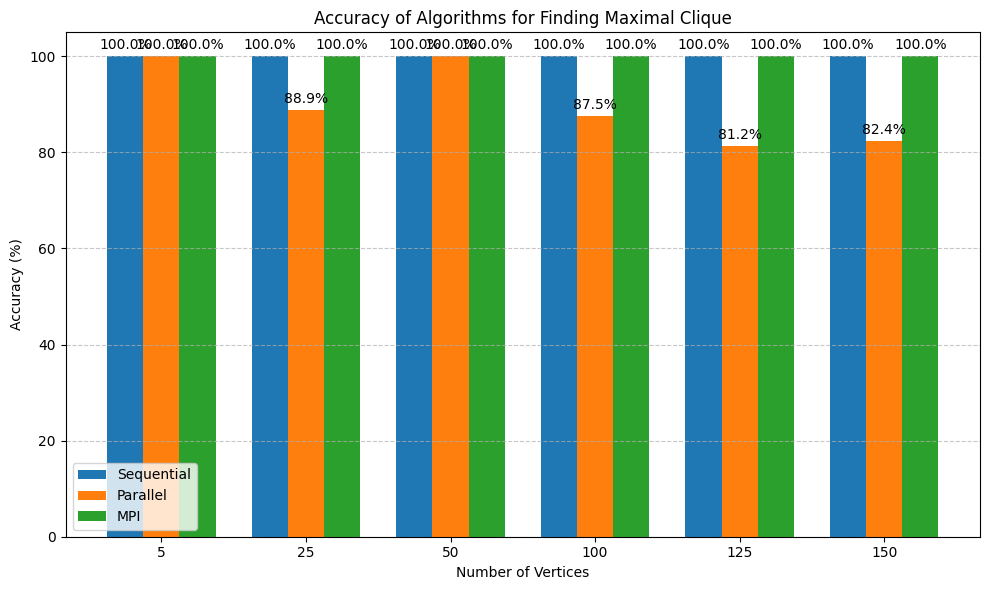

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Data
num_vertices = [5, 25, 50, 100, 125, 150]
expected_output = [4, 9, 11, 16, 16, 17]
sequential = [4, 9, 11, 16, 16, 17]
parallel = [4, 8, 11, 14, 13, 14]
mpi = [4, 9, 11, 16, 16, 17]

# Calculando acurácia em porcentagem
sequential_accuracy = [seq / exp * 100 for seq, exp in zip(sequential, expected_output)]
parallel_accuracy = [par / exp * 100 for par, exp in zip(parallel, expected_output)]
mpi_accuracy = [m / exp * 100 for m, exp in zip(mpi, expected_output)]

# Cria um gráfico de barras
x = np.arange(len(num_vertices))
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, sequential_accuracy, width, label='Sequential')
bars2 = ax.bar(x, parallel_accuracy, width, label='Parallel')
bars3 = ax.bar(x + width, mpi_accuracy, width, label='MPI')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy of Algorithms for Finding Maximal Clique')
ax.set_xticks(x)
ax.set_xticklabels(num_vertices)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos com valores acima das barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### Validation Analysis

From the analysis and the table above, we can conclude that both the sequential and MPI algorithms can be validated for correctness under most scenarios. However, the parallel implementation introduces a **greedy heuristic** by ordering the vertices based on their degree (number of edges) and modifying the vector slightly by swapping a value in each iteration. 

While this heuristic improves performance, it also increases the likelihood of the parallel implementation getting stuck in **local maximum**, as it prioritizes high-degree vertices without exploring other possible combinations. This can be seen as the average accuracy according to the graph is 90% for parallel implementation.

Furthermore, it must be emphasized that there is a chance for the MPI implementation to fail in finding the correct number of vertices in the maximal clique due to candidates being distributed across processes. This limitation arises because no single process considers the entire graph, which can lead to missing cliques that span across process boundaries.


---

## Results

In order to analyze the results they were gathered in the table below:

| **Number of Vertices** | **Sequential**       | **Parallel**        | **MPI**            |
|-------------------------|----------------------|---------------------|--------------------|
| 5                       | `1.784e-06 s`                 | `4.3781e-05 s`               | `1.0566e-05 s`              | 
| 25                      | `1.353e-05 s`                 | `4.6745e-05 s`               | `3.658e-05 s`              |
| 50                      | `0.000347601 s`                | `5.003e-05 s`              | `0.000951243 s`             |
| 100                     | `0.0184986 s`                | `4.9623e-05 s`              | `0.046994 s`             | 
| 125                     | `0.0871758 s`                | `5.7201e-05 s`              | `0.328197 s`             | 
| 150                     | `0.436972 s`                | `6.0627e-05 s`              | `1.3293 s`             | 
| 200                     | `3.63425 s`                | `5.1983e-05 s`              | `10.8122 s s`             | 
| 250                     | `25.5046 s`                | `5.8703e-05 s`              | `82.0266 s`             | 


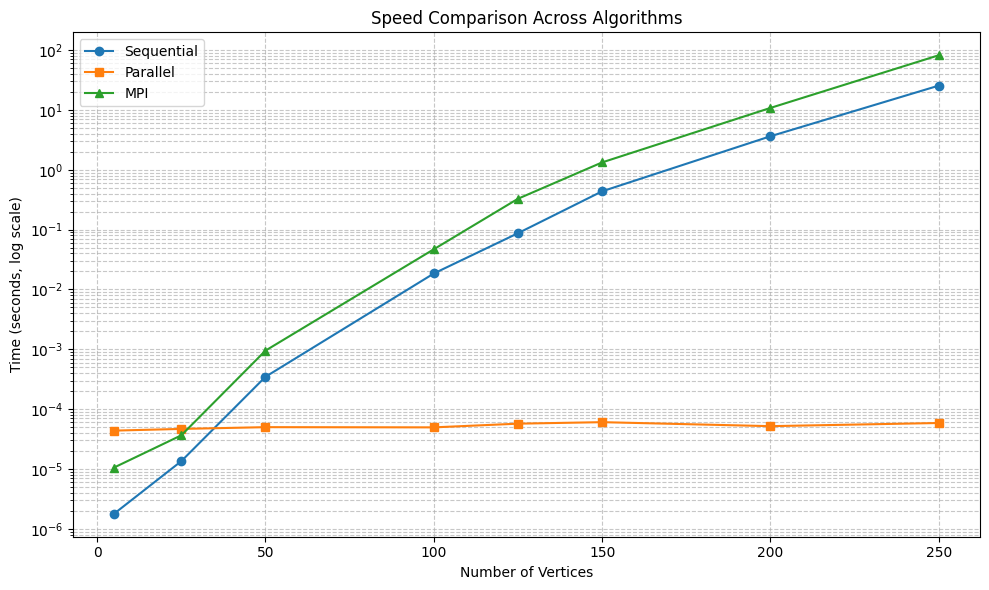

In [67]:
# Data
num_vertices = [5, 25, 50, 100, 125, 150, 200, 250]
sequential = [1.784e-06, 1.353e-05, 0.000347601, 0.0184986, 0.0871758, 0.436972, 3.63425, 25.5046]
parallel = [4.3781e-05, 4.6745e-05, 5.003e-05, 4.9623e-05, 5.7201e-05, 6.0627e-05, 5.1983e-05, 5.8703e-05]
mpi = [1.0566e-05, 3.658e-05, 0.000951243, 0.046994, 0.328197, 1.3293, 10.8122, 82.0266]

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Escala logarítmica para melhor visualização
plt.plot(num_vertices, sequential, marker='o', label='Sequential', linestyle='-')
plt.plot(num_vertices, parallel, marker='s', label='Parallel', linestyle='-')
plt.plot(num_vertices, mpi, marker='^', label='MPI', linestyle='-')

plt.xscale('linear')
plt.yscale('log')  
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds, log scale)')
plt.title('Speed Comparison Across Algorithms')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### **Results Analysis**

In the table above, it is easy to visualize that the fastest implementation for a graph with a large number of vertices is the **Parallel** one. However, its accuracy is not the best. In cases where a real-time solution with a good enough margin for errors is acceptable, the parallel implementation with the greedy heuristic is the best choice.


**Key Observations**

1. **Performance Across Implementations**:
   - **Parallel**:
     - The parallel implementation is the fastest for large graphs due to its simple and efficient computation.
   - **Sequential**:
     - The sequential approach is slower but guarantees accuracy because it explores all possibilities exhaustively.
   - **MPI**:
     - The MPI implementation is slower than the above, likely due to communication overhead.

2. **Accuracy vs Speed**:
   - The **Parallel** implementation sacrifices accuracy for speed by relying on a greedy heuristic.
   - The **Sequential** implementation remains fully accurate at the cost of performance.
   - The **MPI** implementation balances accuracy and parallelism but suffers from overhead.

**Possible Reasons for MPI Slowness**

1. **Insufficient Number of Threads**:
   - The MPI implementation might not have enough threads or processes to offset the overhead introduced by parallelism.

2. **Communication Overhead**:
   - Distributed memory in MPI requires frequent communication between processes, which becomes a bottleneck as graph size increases.

3. **Heterogeneous Cluster Performance**:
   - Variability in machine specifications within the cluster can lead to imbalanced computation times, slowing down the overall runtime.

4. **Bitset vs Bitgraph**:
   - The sequential implementation benefit from **bitset**, which is optimized for adjacency operations.
   - The MPI implementation uses **bitgraph**, which may introduce inefficiencies in memory access and computation.

5. **Not Enough Vertexes**:
   - Maybe using extremely large graphs will make the performance of the MPI surpass the time of the sequential implementation.



---

## Conclusion

The parallel implementation is the best option for scenarios prioritizing speed, while the sequential algorithm guarantees accuracy at the expense of performance. The MPI implementation combines accuracy with distributed computation but needs a different approach to handle larger graphs efficiently.